In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AliHaider20/AIM-5001/main/diamonds.csv").drop("Unnamed: 0", axis=1)
# Checking if the dataframe is correctly loaded.
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Summary

- **Price** - Price in US dollars (326 USD -- 18,823 USD)
    + **Mean** - 3932.799722
    + **Standard Deviation** - 3989.439738	

- **Carat** - Weight of the diamond (0.2--5.01)
    + **Mean** - 0.797940
    + **Standard Deviation** - 0.474011

- **Cut** - Quality of the cut (Fair, Good, Very Good, Premium, Ideal). Here are the percentages of the Cut values present in the dataset.
    + Ideal: 0.399537, Premium: 0.255673, Very Good: 0.223990, Good: 0.090953, Fair: 0.029848.

- **Color** - diamond colour, from D (best) to J (worst). Here are the percentages of the Color values present in the dataset.
    + G: 0.209344, E: 0.181628, F: 0.176900, H: 0.153949, D: 0.125603, I: 0.100519, J: 0.052058.
    
- **Clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)). Here are the percentages of the Clarity values present in the dataset.
    + SI1: 0.242214, VS2: 0.227253, SI2: 0.170449, VS1: 0.151483, VVS2: 0.093919, VVS1: 0.067760, IF: 0.033185, I1: 0.013737.

- **X** - length in mm (0--10.74)
    + **Mean** - 5.731157
    + **Standard Deviation** - 1.121761

- **Y** - y width in mm (0--58.9)
    + **Mean** - 5.734526
    + **Standard Deviation** - 1.142135

- **Z** - depth in mm (0--31.8)
    + **Mean** - 3.538734
    + **Standard Deviation** - 0.705699

- **Depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    + **Mean** - 61.749405
    + **Standard Deviation** - 1.432621

- **Table** - width of top of diamond relative to widest point (43--95)
    + **Mean** - 57.457184
    + **Standard Deviation** - 2.234491

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
print(len(df))
df.info();

53940
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.cut.value_counts(normalize=True)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

In [6]:
df.clarity.value_counts(normalize=True)

SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64

In [7]:
df.color.value_counts(normalize=True)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

# EDA

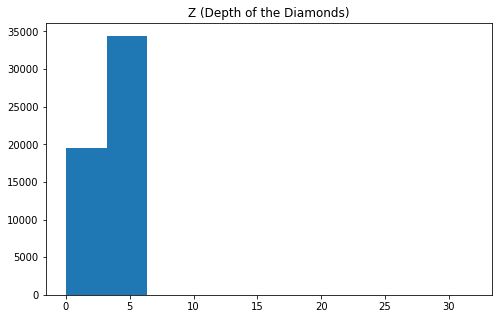

In [8]:
plt.figure(figsize=(8,5))
plt.title("Z (Depth of the Diamonds)")
plt.hist(df.z);

# Obeservations
- The data is normally distributed.
- There are very few Diamonds with depth less than 5.

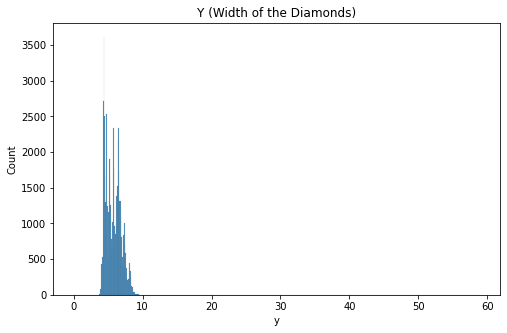

In [9]:
plt.figure(figsize=(8,5))
plt.title("Y (Width of the Diamonds)")
sns.histplot(x='y', data=df);

# Observations
- The data looks to be rightly skewed.

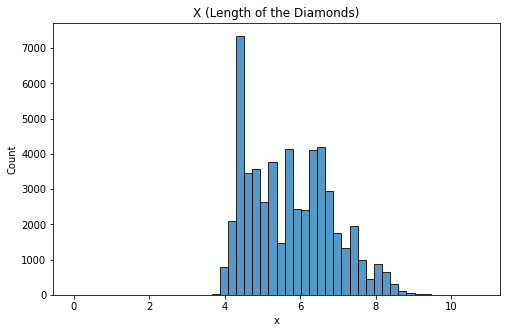

In [10]:
plt.figure(figsize=(8,5))
plt.title("X (Length of the Diamonds)")
sns.histplot(x='x', data=df, bins=50);

# Observations
- The length data looks to be normally distributed.
- Most of the Diamonds have length less than 6.2.
- Most of the Diamonds length's fall in the range 4-5.

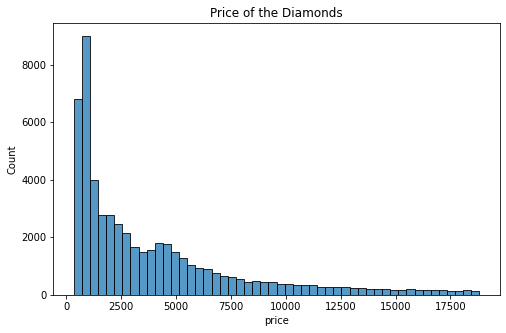

In [11]:
plt.figure(figsize=(8,5))
plt.title("Price of the Diamonds")
sns.histplot(x='price', data=df, bins=50);

# Observations
- The Price data is positively skewed.
- Most of the data value lie between 0 and 4500.

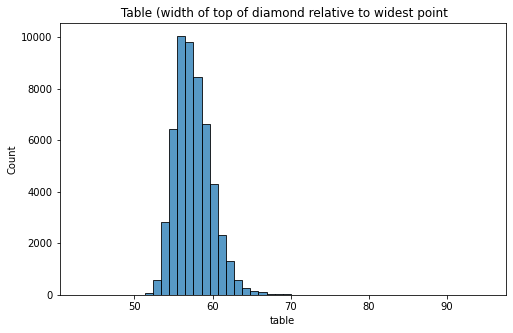

In [12]:
plt.figure(figsize=(8,5))
plt.title(" Table (width of top of diamond relative to widest point")
sns.histplot(x='table', data=df, bins=50);

# Observations
- The data is table normally distributed.
- Most of the table data points lie between 50 and 50.8.

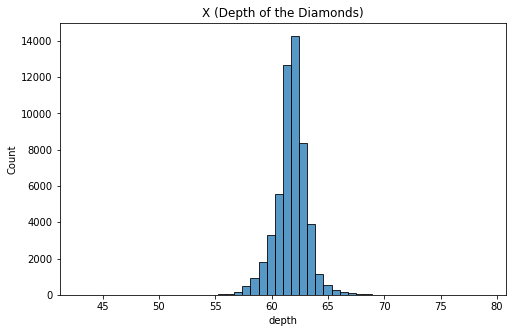

In [13]:
plt.figure(figsize=(8,5))
plt.title("X (Depth of the Diamonds)")
sns.histplot(x='depth', data=df, bins=50);

# Observations
- The data is normally distributed.
- Most of Diamonds have depth of 4.37 mm.

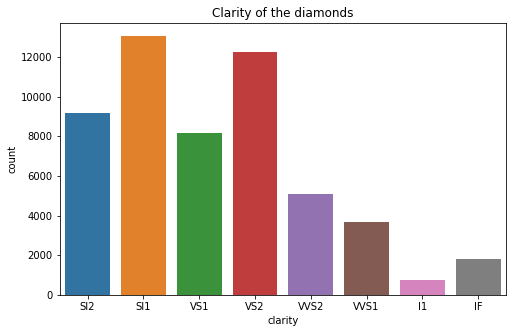

In [14]:
plt.figure(figsize=(8,5))
plt.title("Clarity of the diamonds")
sns.countplot(x="clarity", data = df);

# Observations
- Most of the diamonds are of SI2, SI1, and VS2 i.e average quality.
- There are only few diamonds with IF (best) quality.

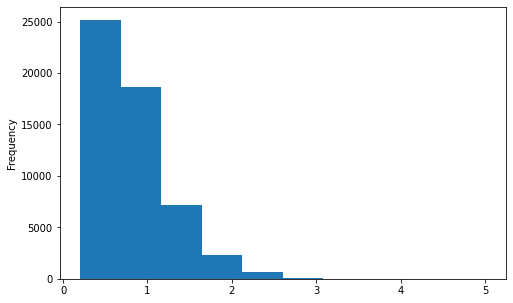

In [15]:
plt.figure(figsize=(8,5))
df.carat.plot(kind='hist');

# Observations
- The carat datapoints are positively skewed.
- Most of the datapoints lie between 0.2 and 0.9.

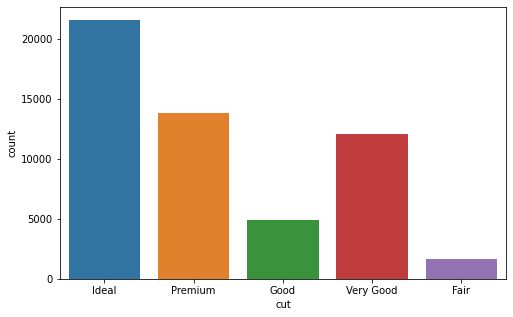

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'cut', data=df);

# Observations
- Most of the diamonds have cut quality of Ideal and Premium which are considered to be best cut quality.

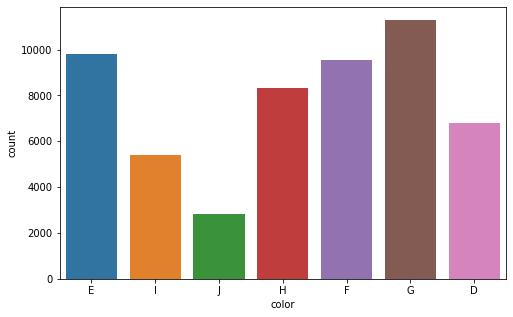

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'color', data=df);

# Observations
- Most of the diamonds have colors E, H, F, and G which are considered as Good.
- We've more than 6000 daimonds with best color.
- There are very less daimonds with worst color i.e J.

# Inferences

## Q1: What proportion of diamonds are between .30 and 1.08 carats?

In [18]:
print("The proportion of the diamonds whos carat values comes between .30 and 1.08 (exclusive) is", len(df[(df.carat > .30) & (df.carat < 1.08)])/len(df))

The proportion of the diamonds whos carat values comes between .30 and 1.08 (exclusive) is 0.6939933259176864


## Q2: How many of the diamonds have equal x and y dimensions?

In [19]:
print(f"There are {len(df[df.x == df.y])} datapoints where length and width of the diamond are the same")

There are 17 datapoints where length and width of the diamond are the same


## Q3: How many of the diamonds have a carat value that is less than the mean carat value?

In [20]:
print(f"There are {len(df[df.carat < df.carat.mean()])} diamonds whose carat values are less than mean carat value")

There are 31127 diamonds whose carat values are less than mean carat value


## Q4: How many diamonds have a Premium cut or better?

In [21]:
print(f"There are {len(df[(df.cut == 'Premium') | (df.cut == 'Ideal')])} diamonds who has Premium cut or Ideal")

There are 35342 diamonds who has Premium cut or Ideal


## Q5: Which diamond has the highest price per carat? What is its value?


In [22]:
price_per_carat = (df.price/df.carat)
print("Diamond number {0} has highest price per carat value".format(price_per_carat[price_per_carat == price_per_carat.max()].index[0]))

Diamond number 27635 has highest price per carat value


## Q6: Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.

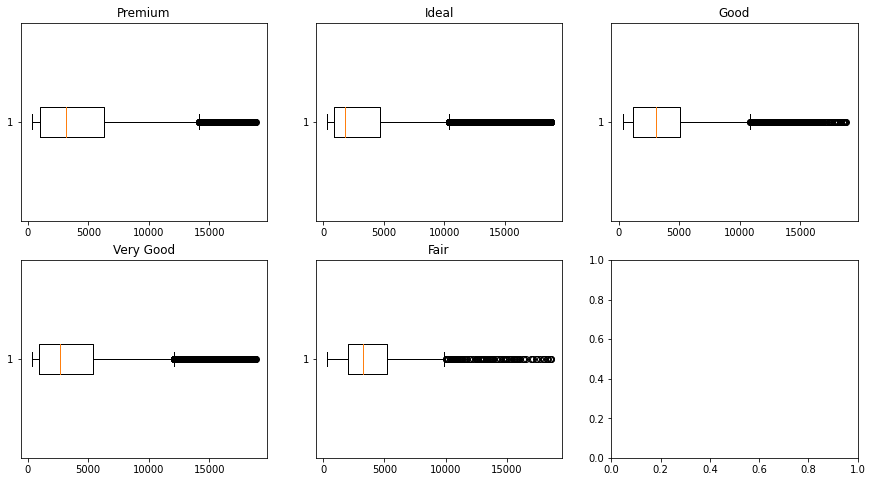

In [23]:
fig, axs = plt.subplots(2,3, figsize=(15,8))
axs[0,0].boxplot(df[df.cut == "Premium"].price, vert=False)
axs[0,0].set_title("Premium")
axs[0,1].boxplot(df[df.cut == "Ideal"].price, vert=False)
axs[0,1].set_title("Ideal")
axs[0,2].boxplot(df[df.cut == "Good"].price, vert=False)
axs[0,2].set_title("Good")
axs[1,0].boxplot(df[df.cut == "Very Good"].price, vert=False)
axs[1,0].set_title("Very Good")
axs[1,1].boxplot(df[df.cut == "Fair"].price, vert=False)
axs[1,1].set_title("Fair");

## Observations
- As it can be observed all the above boxplots are rightly skewed.
- Compared to others price of Fair cut is not much skewed.
- Among all the cut the maximum value close to 15000 is for the premium cut.
- There are 7 values where x (length), y (width), and z depth are 0 which means the data is missing. The data can be replaced my NaN or left as it is. It can alter the Statistics if considered as 0.

## Q7: Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


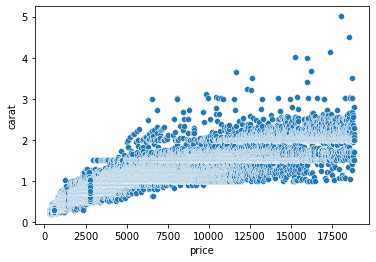

In [24]:
sns.scatterplot(df.price, df.carat);

## Observations
- Above is the scatter plot of Price vs Carat.
- It can be observed that Price of the diamond increases as the carat increases.
- There are many diamonds who's carat value are low but the price is equal or more than the diamond who's carat value are high.

In [25]:
# Datapoints where length, width, and height are equal.
df[(df.x == df.y) & (df.y == df.z) & (df.x == df.z)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


# Conclusion
- The purpose of this project is to analyse the Diamond dataset.
- Firstly, we've identified that the continuous features have a many outliers and are rightly skewed using Boxplots.
- Secondly, we've found there are 17 diamonds who has same length and width.
- There are 7 values where x (length), y (width), and z depth are 0 which means the data is missing. The data can be replaced my NaN or left as it is. They can alter the Statistics if considered as 0.

# References

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html